# 비전 기능

# 개요
GPT-4o는 언어 처리와 시각적 이해를 모두 포함합니다. \ 
이 멀티모달 기능은 모델이 텍스트뿐만 아니라 이미지를 기반으로 내용을 이해하고 생성할 수 있도록 합니다. \ 
이는 이미지 캡션 생성, 시각적 질문 응답, 시각적 콘텐츠에 대한 상세 설명 생성 등 다양한 응용 프로그램에 사용할 수 있습니다.

더 자세한 예시는 공식 문서 [GPT With Vision](https://learn.microsoft.com/en-us/azure/ai-services/openai/how-to/gpt-with-vision?tabs=rest%2Csystem-assigned%2Cresource)을 참조하세요.

### GPT-4o를 사용하여 이미지 설명하기
GPT-4o를 사용하면 텍스트 입력과 함께 이미지를 처리하고 이해할 수 있습니다. \
이 예제는 GPT-4o 모델에 이미지를 전송하고 설명 텍스트 출력을 얻는 방법을 보여줍니다.

---
**사전 준비** \
GPT-4o 모델을 사용하기 위한 Azure OpenAI 리소스 접근 권한.

#### 1. 작업할 이미지를 표시하기

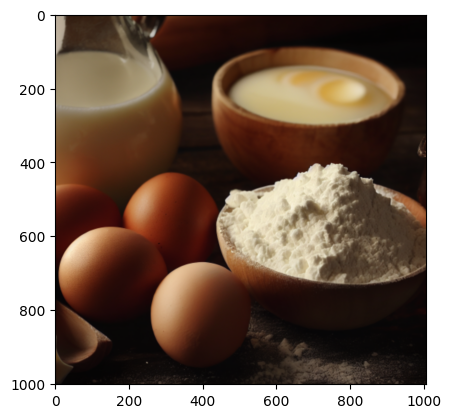

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_PATH = "./data/ingredients.png"

img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.show()


#### 2. 도우미 라이브러리를 가져오고 설정 구성하기

In [2]:
import os
import requests
import base64

from dotenv import load_dotenv

load_dotenv()

GPT4V_KEY = os.getenv('AZURE_OPENAI_KEY')
GPT4V_ENDPOINT = f"{os.getenv('AZURE_OPENAI_ENDPOINT')}openai/deployments/{os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME')}/chat/completions?api-version=2024-02-15-preview"


#### 3. 이미지 인코딩 및 요청 처리를 위한 함수 생성하기

In [3]:
def encode_image_to_base64(image_path):
    """Read and encode the image file to base64."""
    with open(image_path, 'rb') as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('ascii')
    return encoded_image

def send_request(endpoint, headers, payload):
    """Send the API request and return the response."""
    try:
        response = requests.post(endpoint, headers=headers, json=payload)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        return response.json()
    except requests.RequestException as e:
        raise SystemExit(f"Failed to make the request. Error: {e}")

#### 4. 페이로드 준비 및 요청 전송하기

In [5]:

encoded_image = encode_image_to_base64(IMAGE_PATH)
headers = {
    "Content-Type": "application/json",
    "api-key": GPT4V_KEY,
}

payload = {
  "messages": [
    {
      "role": "system",
      "content": [
        {
          "type": "text",
          "text": "You are an AI assistant that helps people find information."
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{encoded_image}"
          }
        },
        {
          "type": "text",
          # "text": "사진에 대해 자세히 설명해줘"
          # "text": "사진에 있는 재료로 맛있는 요리법 알려줘"
          "text": "계란 4개 있는거 아냐?"
        }
      ]
    }
  ],
  "temperature": 0.7,
  "top_p": 0.95,
  "max_tokens": 800
}

response_json = send_request(GPT4V_ENDPOINT, headers, payload)

print(response_json['choices'][0]['message']['content'])

네, 이미지에 계란이 4개 보입니다.


#### 탐색할 사용 사례
1. **콘텐츠 생성** \
블로그, 소셜 미디어 및 기타 콘텐츠 플랫폼에서 사용되는 이미지에 대한 설명을 자동으로 생성합니다.

2. **접근성** \
모두를 위한 접근성을 향상시키기 위해 상세한 이미지 설명을 제공합니다.

3. **이미지 분류** \
이미지를 미리 정의된 카테고리로 분류합니다.

4. **전자상거래** \
제품 이미지를 기반으로 제품 설명을 생성하여 쇼핑 경험을 개선합니다.